In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

import numpy as np

In [2]:
X_train_dir = 'X_train/Train_White_Shoes'
y_train_dir = 'y_train/Test_White_Shoes'

In [3]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png', 'webp']

In [4]:
for image_class in os.listdir(X_train_dir):
    print(image_class)

test_white_shoe1.png
test_white_shoe10.jpg
test_white_shoe11.webp
test_white_shoe12.webp
test_white_shoe13.webp
test_white_shoe14.webp
test_white_shoe15.jpg
test_white_shoe16.jpg
test_white_shoe17.jpg
test_white_shoe18.jpg
test_white_shoe19.webp
test_white_shoe2.png
test_white_shoe20.webp
test_white_shoe21.webp
test_white_shoe22.jpg
test_white_shoe3.jpg
test_white_shoe4.png
test_white_shoe5.jpg
test_white_shoe6.jpg
test_white_shoe7.webp
test_white_shoe8.jpg
test_white_shoe9.png


In [5]:
import cv2

In [7]:
X_train_rescale = ImageDataGenerator(rescale = 1/255)
y_train_rescale = ImageDataGenerator(rescale = 1/255)



In [8]:
X_train_dataset = X_train_rescale.flow_from_directory('X_train/',
                                            target_size = (200, 200),
                                            batch_size = 3)

y_train_dataset = y_train_rescale.flow_from_directory('y_train/',
                                               target_size = (200, 200),
                                               batch_size = 3)


Found 19 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [9]:
X_train_dataset.class_indices

{'Train_Black_Shoes': 0, 'Train_White_Shoes': 1}

In [10]:
X_train_dataset.classes

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (200, 200, 3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    #
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    #
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    ##
                                    tf.keras.layers.Flatten(),

                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),

                                    ##
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')
                                    
                                    
                                    
                                    ])

In [12]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

In [13]:
model_fit = model.fit(X_train_dataset,
                      epochs = 10, 
                      validation_data = y_train_dataset)

Epoch 1/10



7/7 [==============================] - 2s 200ms/step - loss: 1.6410 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 1s 174ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - 1s 181ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/10
7/7 [==============================] - 1s 192ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
7/7 [==============================] - 1s 185ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
7/7 [==============================] - 1s 186ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
7/7 [==============================] - 1s 187ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/10
7/7 [===============

In [14]:
y_test_rescale = ImageDataGenerator(rescale = 1/255)

y_test_dataset = y_train_rescale.flow_from_directory('y_test/',
                                                     target_size = (200, 200),
                                                     batch_size = 3)

y_test_dataset.classes





Found 13 images belonging to 2 classes.


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

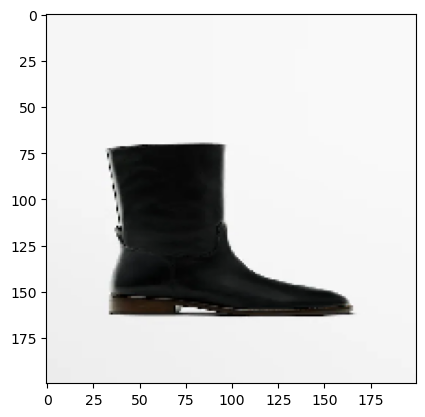

1/1 [==============================] - 0s 74ms/step
Not White Shoes


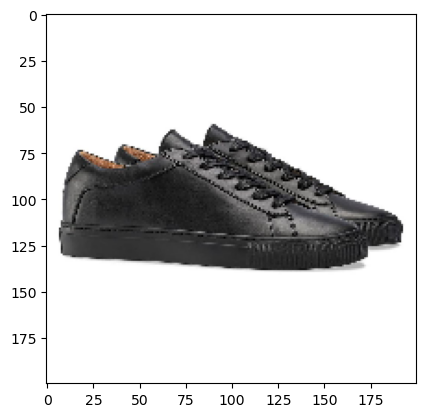

1/1 [==============================] - 0s 23ms/step
Not White Shoes


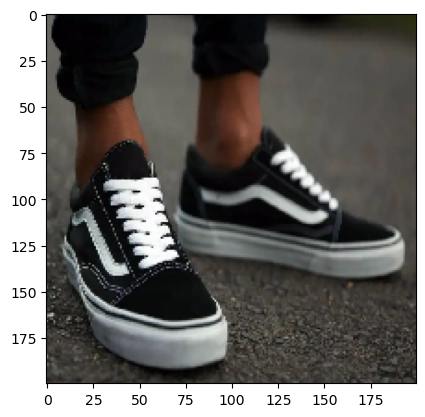

1/1 [==============================] - 0s 23ms/step
Not White Shoes


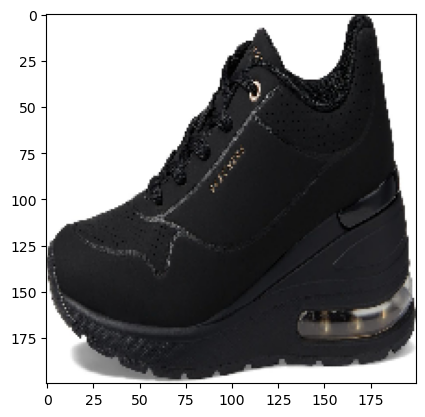

1/1 [==============================] - 0s 23ms/step
Not White Shoes


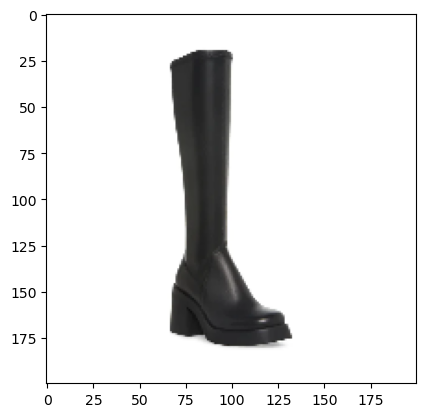

1/1 [==============================] - 0s 23ms/step
Not White Shoes


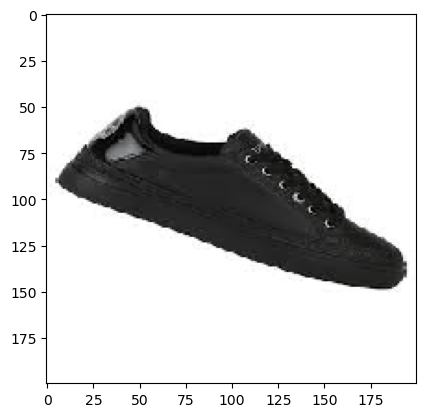

1/1 [==============================] - 0s 31ms/step
Not White Shoes


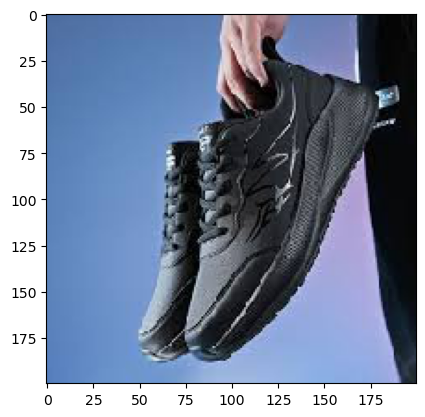

1/1 [==============================] - 0s 23ms/step
Not White Shoes


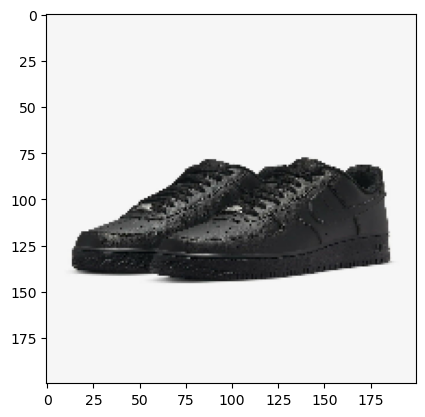

1/1 [==============================] - 0s 21ms/step
Not White Shoes


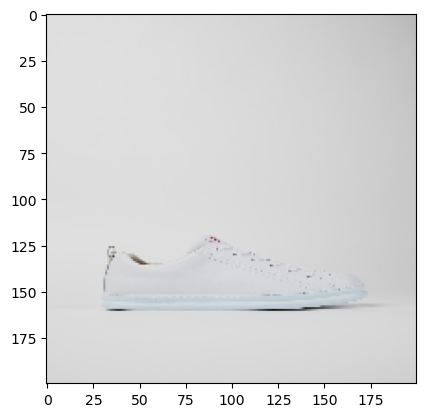

1/1 [==============================] - 0s 19ms/step
Not White Shoes


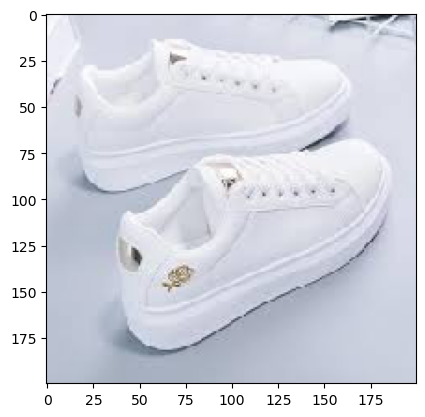

1/1 [==============================] - 0s 20ms/step
Not White Shoes


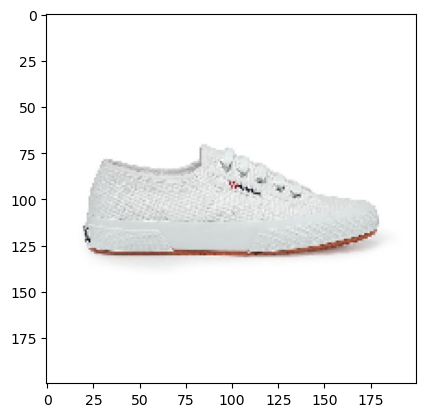

1/1 [==============================] - 0s 18ms/step
Not White Shoes


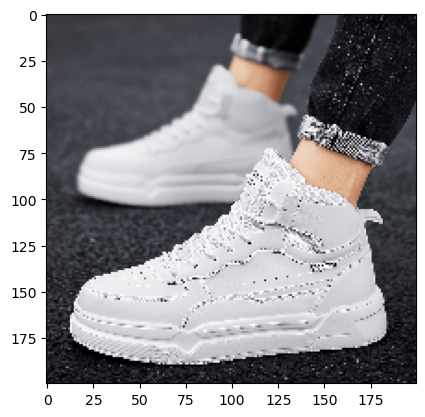

1/1 [==============================] - 0s 24ms/step
Not White Shoes


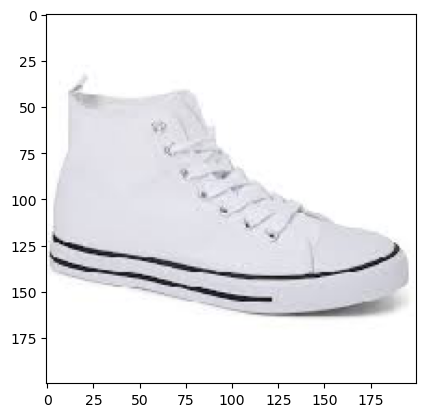

1/1 [==============================] - 0s 20ms/step
Not White Shoes


In [15]:
filenames = y_test_dataset.filenames

for i, filename in enumerate(filenames):

    # Construct the full path to the image
    img_path = os.path.join('y_test/', filename)
    
    y_test_img = image.load_img(img_path, target_size=(200, 200))
    plt.imshow(y_test_img)
    plt.show()

    X = image.img_to_array(y_test_img)
    X = np.expand_dims(X, axis=0)
    y_test_images = np.vstack([X])
    y_predict = model.predict(y_test_images)

    if y_predict == 0:
        print('White Shoes')
    else:
        print('Not White Shoes')
